- Name: Muhammad Rizki Achirlita
- Gmail: muh.rizkiachirlita@gmail.com

In [1]:
## Basic Packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
sns.set(font_scale=1.2, palette='Set1')

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 150

In [2]:
df = pd.read_csv('Data/loan_data_2007_2014.csv')
df.sample(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
155827,3701571,4674728,20000,20000,20000.0,36 months,12.12,665.44,B,B3,LAKE SHORE COUNTRY CLUB,10+ years,RENT,58000.0,Not Verified,13-Mar,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,MONEY SAVER,600xx,IL,19.18,0.0,Aug-00,1.0,NaN,NaN,10.0,0.0,9232,39.8,15.0,f,1960.88,1960.88,21953.36,21953.36,18039.11,3914.25,0.0,0.0,0.0,16-Jan,665.44,16-Feb,16-Jan,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,38830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23200.0,NaN,NaN,NaN
270145,32339013,34952247,11200,11200,11200.0,60 months,13.98,260.49,C,C3,Budget Analyst,7 years,RENT,60000.0,Source Verified,14-Oct,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,303xx,GA,10.28,2.0,22-Feb,0.0,15.0,66.0,7.0,1.0,4611,17.3,15.0,w,0.00,0.00,12398.67,12398.67,11200.00,1198.67,0.0,0.0,0.0,15-Jul,10323.45,NaN,15-Aug,1.0,15.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,74.0,42861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26700.0,NaN,NaN,NaN
309780,26859560,29342605,32350,32350,32350.0,60 months,19.52,848.47,E,E2,Pricing Analyst,5 years,MORTGAGE,73542.0,Verified,14-Sep,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,357xx,AL,21.20,0.0,Jul-93,0.0,30.0,NaN,12.0,0.0,18308,73.8,26.0,w,26514.71,26514.71,13575.52,13575.52,5835.29,7740.23,0.0,0.0,0.0,16-Jan,848.47,16-Feb,16-Jan,0.0,38.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,250695.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24800.0,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [3]:
## Definsikan Target (Asumsi user memberi kriteria yang ketat)
df = df[~(df['loan_status']=='Does not meet the credit policy. Status:Fully Paid')]
df = df[~(df['loan_status']=='Does not meet the credit policy. Status:Charged Off')]
df= df.rename(columns={'loan_status': 'is_default'})
df['is_default'] = df['is_default'].replace({'Current': 'yes', 'Charged Off':'yes', 'Late (31-120 days)': 'yes', 
                                             'In Grace Period': 'yes', 'Late (16-30 days)': 'yes', 'Default': 'yes',
                                             'Fully Paid': 'no'})

In [4]:
round((len(df[df['is_default']=='yes'])/df.shape[0])*100, 2)

60.15

#### Problem

Tingkat gagal bayar pada Lending Company ini sangat besar, yaitu sebesar 60.15%. Berarti, hanya sekitar 39.85% pinjaman yang lancar.

In [5]:
df.shape

(463536, 74)

## CLEANING

In [7]:
def cleaning(df):
    '''Tujuan dari fungsi ini adalah mengetahui kondisi tipe data, unique values, dan null'''
    try:
        import pandas as pd
        variables = pd.DataFrame(columns=['Variabel', 'Tipe Data', 'Jumlah Value Unik', 'Jumlah Value Unik (%)',
                                         'Jumlah Null', 'Jumlah Null (%)', 'Value'])
        for i, var in enumerate(df.columns):
            variables.loc[i] = [var, df[var].dtypes, df[var].nunique(), round(df[var].nunique()/df.shape[0]*100, 2),
                                df[var].isnull().sum(), round(df[var].isnull().sum()/df.shape[0]*100, 2), df[var].unique()]
        return (variables.set_index('Variabel'))
    except:
        print('Input tidak sesuai')
        
cleaning(df).sort_values(by='Jumlah Null (%)', ascending=False)

,Tipe Data,Jumlah Value Unik,Jumlah Value Unik (%),Jumlah Null,Jumlah Null (%),Value
Variabel,,,,,,
inq_last_12m,float64,0,0.00,463536,100.00,[nan]
verification_status_joint,float64,0,0.00,463536,100.00,[nan]
annual_inc_joint,float64,0,0.00,463536,100.00,[nan]
open_acc_6m,float64,0,0.00,463536,100.00,[nan]
open_il_6m,float64,0,0.00,463536,100.00,[nan]
open_il_12m,float64,0,0.00,463536,100.00,[nan]
open_il_24m,float64,0,0.00,463536,100.00,[nan]
mths_since_rcnt_il,float64,0,0.00,463536,100.00,[nan]
total_bal_il,float64,0,0.00,463536,100.00,[nan]


In [6]:
column_identifier = ['id', 'member_id', 'zip_code', 'emp_title', 'addr_state']
column_null = ['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
            'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
            'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_last_record', 'mths_since_last_major_derog',
            'mths_since_last_delinq', 'next_pymnt_d']
column_desc = ['url', 'desc', 'title']
column_1value = ['policy_code', 'application_type']

dell_column = column_identifier + column_null + column_desc + column_1value

In [7]:
df.drop(dell_column, axis=1, inplace=True)

#### Alasan penghapusan kolom: 

- `column_identifier` tidak dipakai dalam pemodelan Machine Learning
- `column_null` berisi Null >45%
- `column_desc` berisi penjabaran (tidak dipakai dalam pemodelan Machine Learning)
- `column_1value` hanya berisi 1 unique value
- `emp_title` dihapus karena terlalu banyak unique value yang bersifat kategorikal

In [8]:
## Periksa Data Duplicate
df.duplicated().sum()

0

In [9]:
## Feature Engineering
df['term']= df['term'].replace({' 36 months': 36, ' 60 months':60})

df['emp_length']= df['emp_length'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, 
                                            '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, 
                                            '10+ years': 10})

df['verification_status'] = df['verification_status'].replace({'Source Verified':'Verified'})
df['home_ownership']= df['home_ownership'].replace({'ANY': 'OWN'})

#### Simpulan Kolom Tipe Data Waktu
- `earliest_cr_line` memiliki format (%b-%y)
- `last_credit_pull_d` memiliki format (%d-%y)
- `Last_pymnt_d` memiliki format (%d-%y)
- `issue_d` memiliki format (%d-%y)
- `next_pymnt_d` memiliki format (%d-%y)

In [10]:
df.shape

(463536, 43)

## EXPLORATORY DATA ANALYSIS

In [11]:
## Buat variabel berdasarkan tipe data
cats = ['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'initial_list_status', 'is_default']
nums = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti','delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'open_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']
date = ['earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'issue_d']
print(f'Jumlah kolom bertipe kategori {len(cats)}')
print(f'Jumlah kolom bertipe numerik {len(nums)}')
print(f'Jumlah kolom bertipe waktu {len(date)}')

Jumlah kolom bertipe kategori 8
Jumlah kolom bertipe numerik 31
Jumlah kolom bertipe waktu 4


In [12]:
df[date].describe()

,earliest_cr_line,last_pymnt_d,last_credit_pull_d,issue_d
count,463536,463172,463496,463536
unique,545,97,102,91
top,22-Sep,16-Jan,16-Jan,14-Oct
freq,16737,179617,326939,38782


In [13]:
df[cats].describe()

,grade,sub_grade,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,is_default
count,463536,463536,463536,463536,463536,463536,463536,463536
unique,7,35,5,2,2,14,2,2
top,B,B3,MORTGAGE,Verified,n,debt_consolidation,f,yes
freq,136575,31613,234619,317131,463527,273095,300256,278797


In [14]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,463536.0,14348.575569,8287.139007,500.00,8000.0000,12000.000000,20000.0000,3.500000e+04
funded_amnt,463536.0,14324.151792,8274.892198,500.00,8000.0000,12000.000000,20000.0000,3.500000e+04
funded_amnt_inv,463536.0,14269.645970,8287.276824,0.00,8000.0000,12000.000000,19975.0000,3.500000e+04
term,463536.0,42.628404,10.730620,36.00,36.0000,36.000000,60.0000,6.000000e+01
int_rate,463536.0,13.827334,4.365371,5.42,10.9900,13.660000,16.4900,2.606000e+01
installment,463536.0,432.891377,243.447747,15.69,257.4300,381.040000,567.3425,1.409990e+03
emp_length,442562.0,6.004379,3.624638,0.00,3.0000,6.000000,10.0000,1.000000e+01
annual_inc,463536.0,73288.385321,54871.713390,3000.00,45000.0000,63000.000000,89000.0000,7.500000e+06
dti,463536.0,17.236823,7.850529,0.00,11.3800,16.880000,22.8000,3.999000e+01
delinq_2yrs,463536.0,0.284947,0.797648,0.00,0.0000,0.000000,0.0000,2.900000e+01


### Univariate Analysis

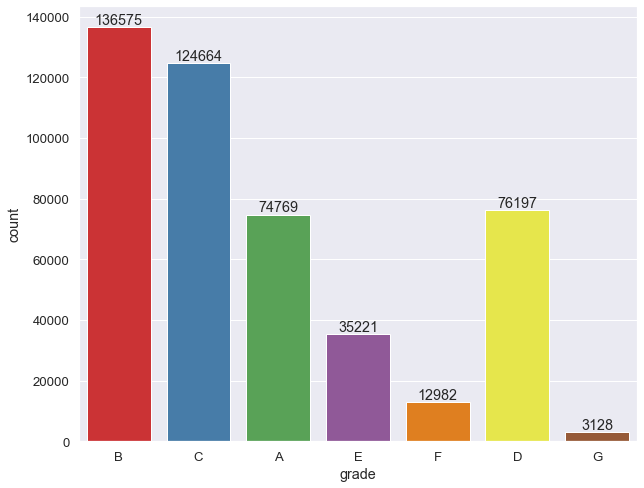

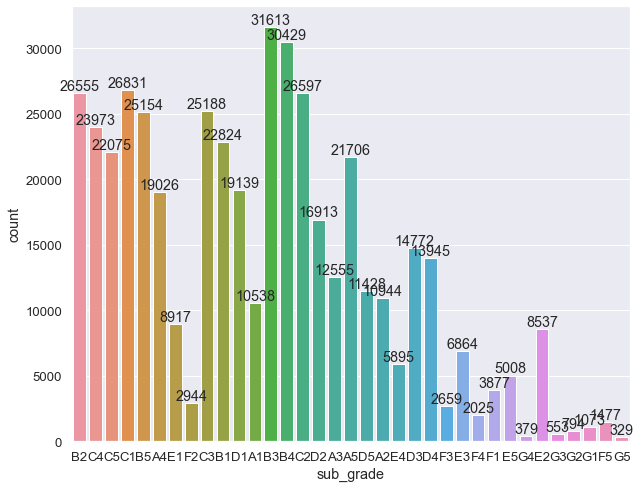

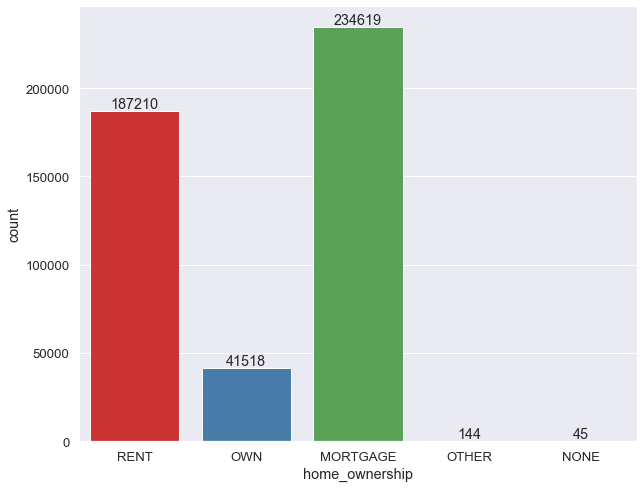

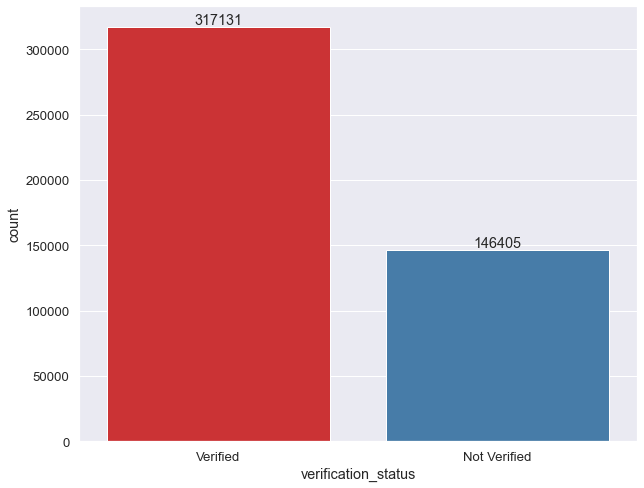

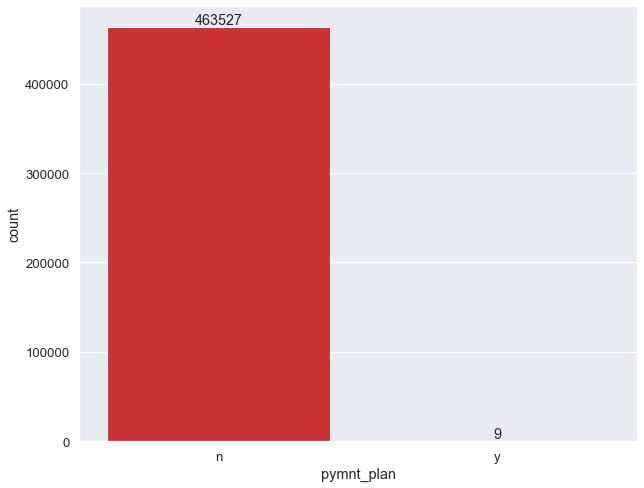

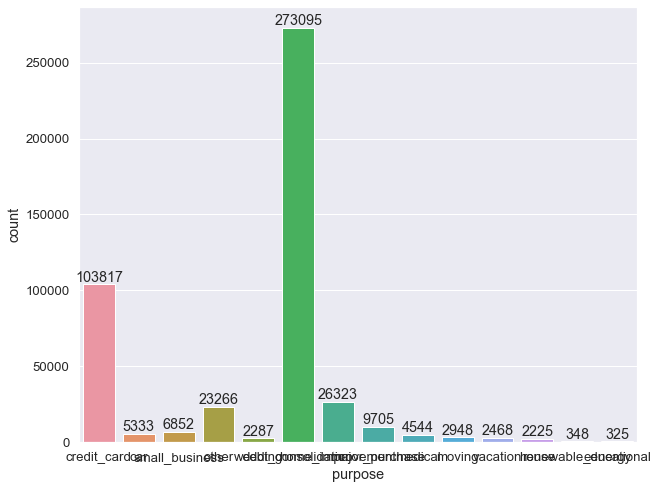

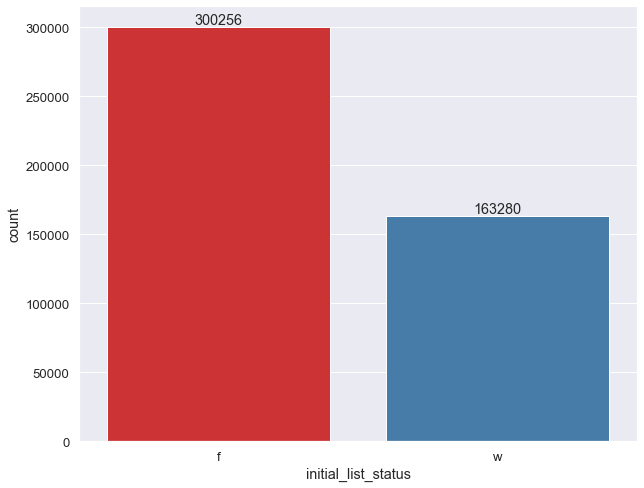

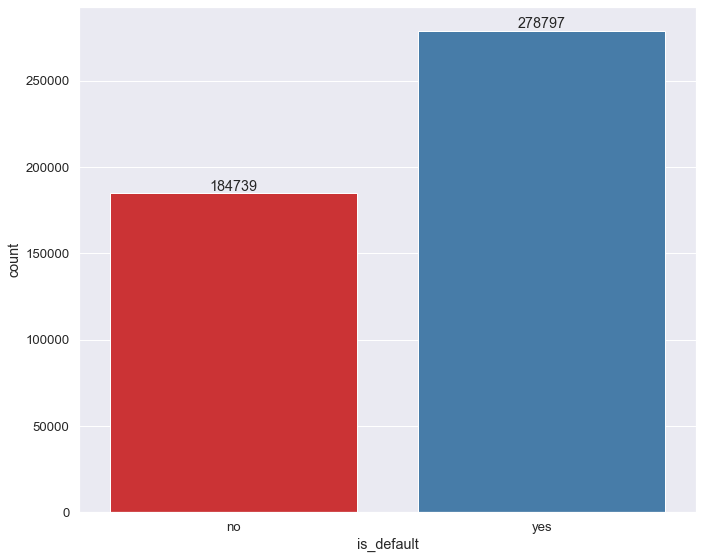

In [15]:
for a, b in enumerate(cats):
    cat = cats[a]
    plt.figure(figsize=(10,8))
    ax= sns.countplot(data=df,x=cat)        
    ax.bar_label(container=ax.containers[0])
plt.tight_layout()

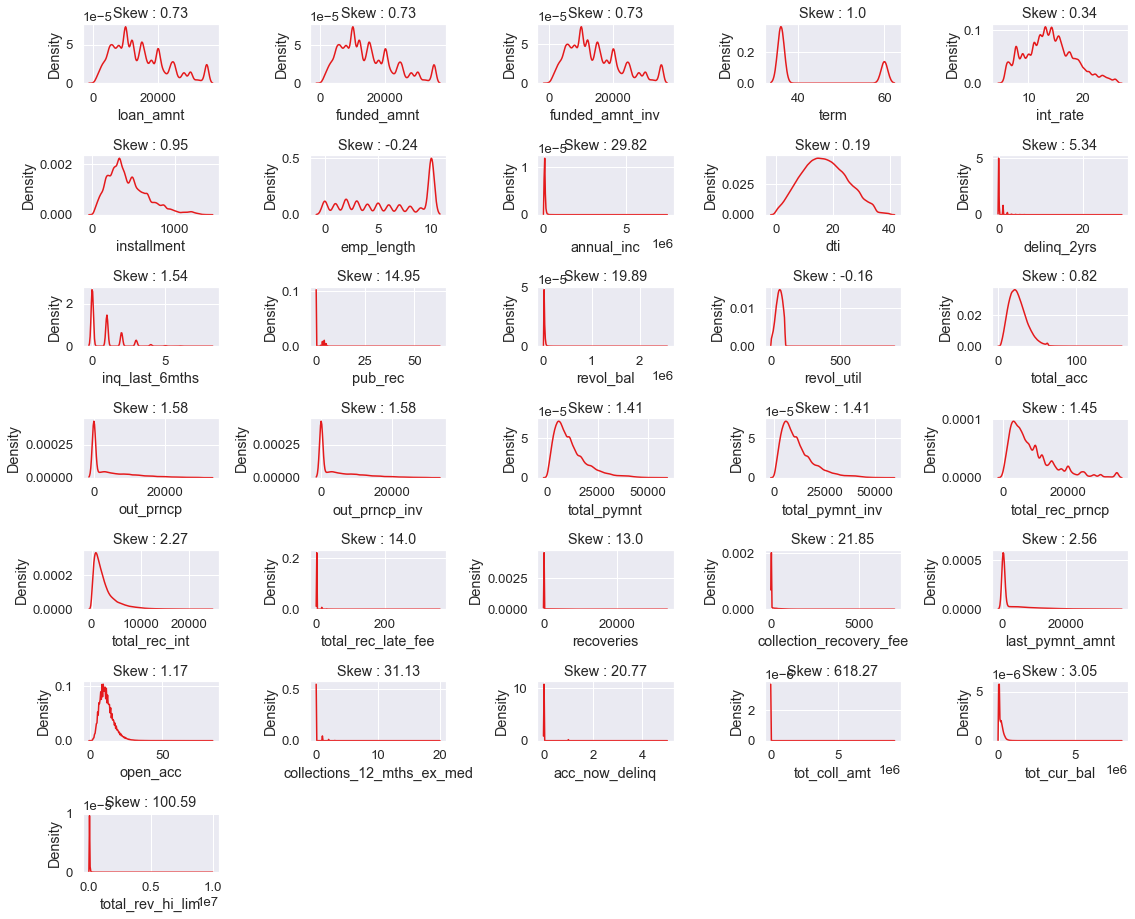

In [16]:
plt.figure(figsize=(16,13))
for c,d in enumerate(nums):
        plt.subplot(7,5, c+1)
        sns.kdeplot(x=df[d])
        plt.title("Skew : "+ str(round(df[d].skew(),2)))
        plt.tight_layout()
plt.tight_layout()

Banyak kolom yang memiliki positif skew yang ekstrim.

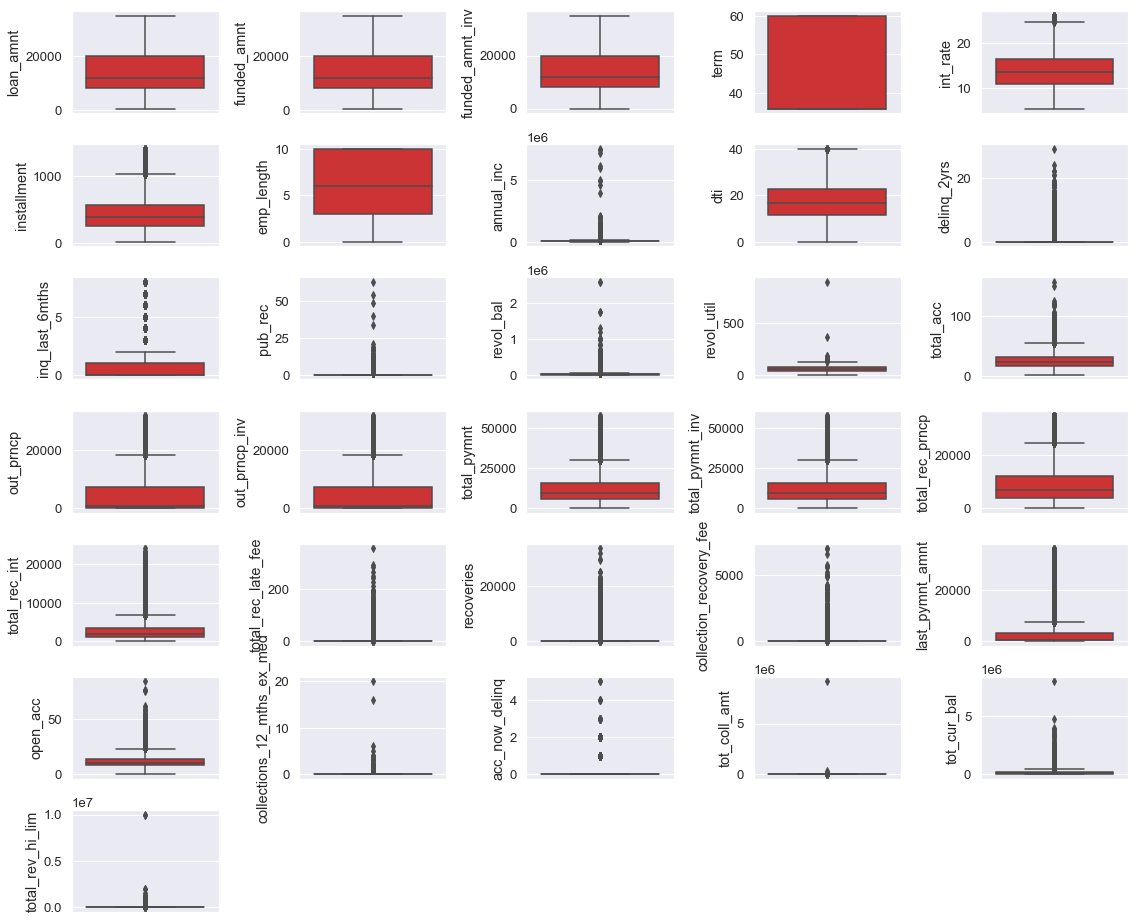

In [17]:
plt.figure(figsize=(16, 13))
for b in range(0, len(nums)):
    plt.subplot(7, 5, b+1)
    sns.boxplot(y=df[nums[b]])
plt.tight_layout()

Banyak kolom yang terdapat ouliers di dalamnya. Outliers tersebut akan di handle pada tahap preprocessing.

### Multivariate Analysis

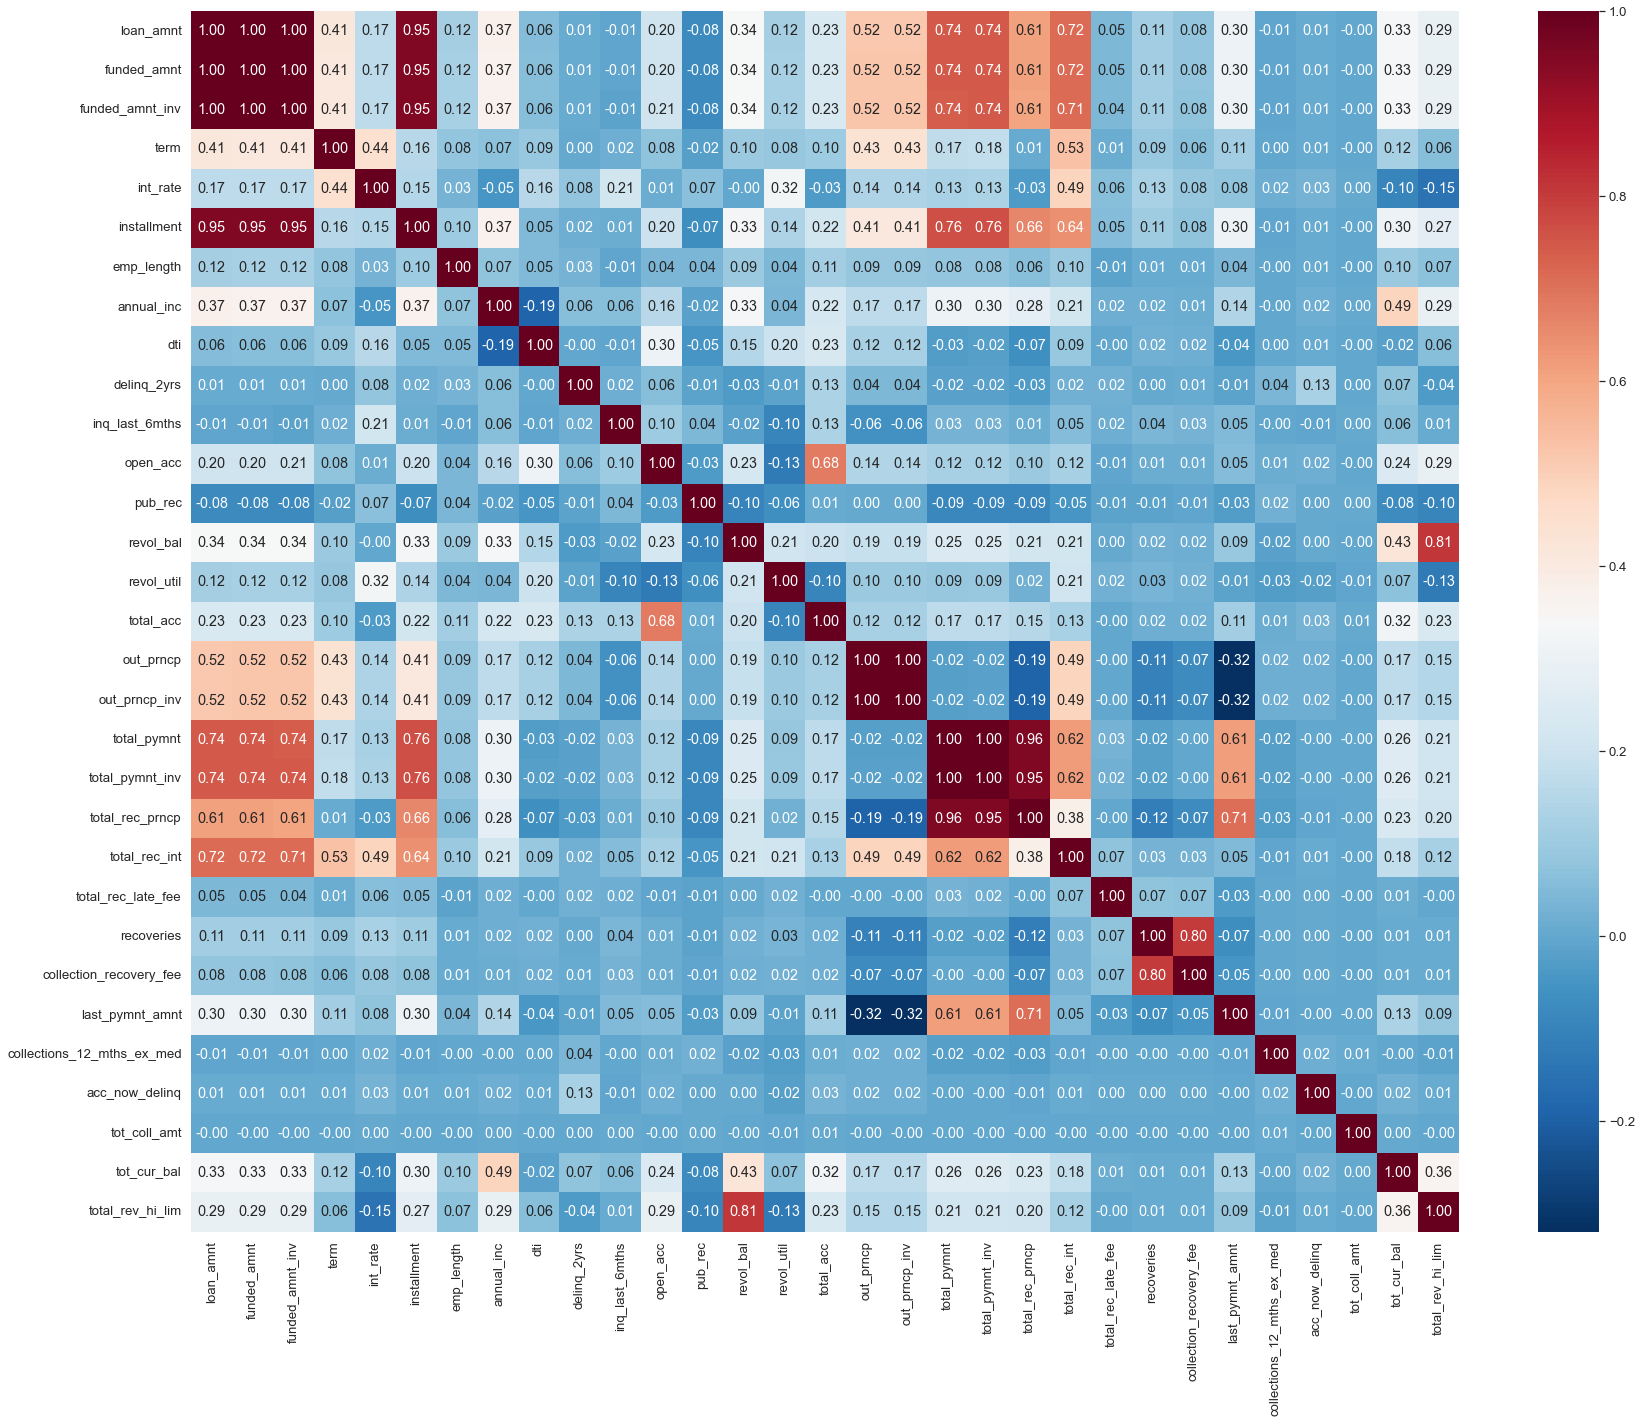

In [18]:
plt.figure(figsize=(25,20))                
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu_r')
plt.tight_layout();

Pada Heatmap saat ini, target belum diikutkan karena akan fokus untuk menemukan kolom-kolom yang terindikasi memiliki gejala multikolinearitas (>0.7).

In [19]:
corr = df.corr().abs()
multikol = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
drop_multikol = [column for column in multikol.columns if any(multikol[column] >= 0.7)]

In [20]:
drop_multikol

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim']

In [21]:
df.drop(drop_multikol, axis=1, inplace=True)
df.sample(3)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,is_default,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
428796,10800,60,15.61,C,C5,2.0,RENT,34000.0,Verified,14-Mar,yes,n,credit_card,23.37,0.0,22-Jun,0.0,17.0,0.0,7158,61.2,23.0,w,7768.13,0.0,0.0,16-Jan,16-Jan,0.0,0.0,0.0,47997.0
458262,5600,36,14.98,C,C3,10.0,MORTGAGE,35000.0,Not Verified,14-Jan,yes,n,debt_consolidation,18.28,0.0,Jun-96,1.0,11.0,1.0,3247,55.0,18.0,f,2150.53,0.0,0.0,16-Jan,16-Jan,0.0,0.0,670.0,20706.0
210365,5100,36,7.90,A,A4,4.0,RENT,36000.0,Not Verified,12-Jul,no,n,debt_consolidation,16.47,0.0,22-Sep,1.0,8.0,0.0,4573,29.5,27.0,f,0.00,0.0,0.0,15-Jul,16-Jan,0.0,0.0,NaN,NaN


In [22]:
## Ubah target menjadi numerik untuk melihat hubungan
df['is_default']= df['is_default'].replace({'yes': 1, 'no':0}) 

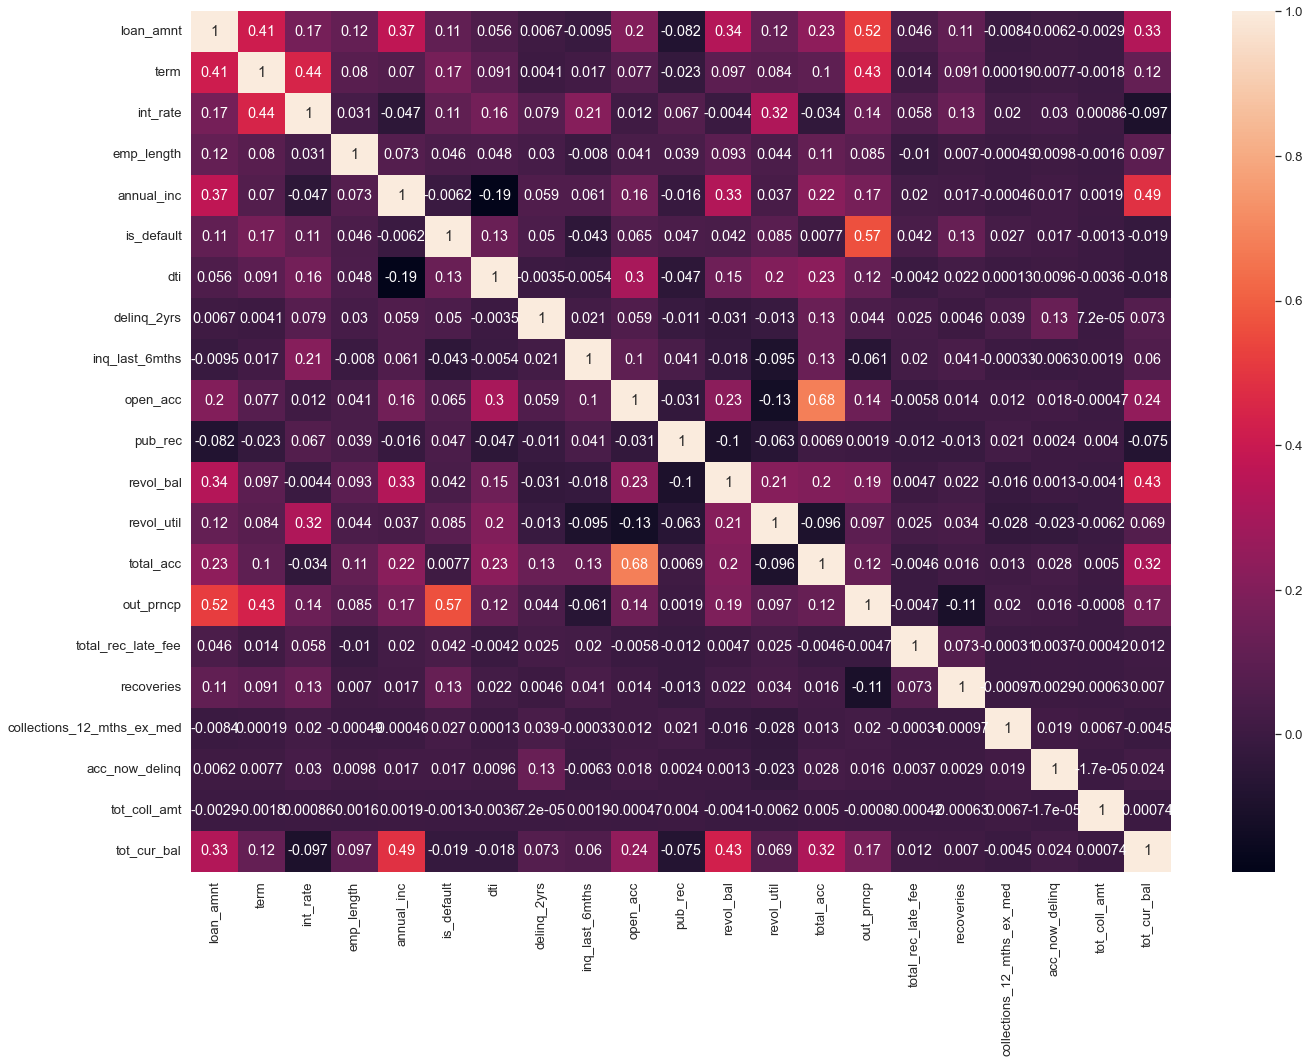

In [24]:
plt.figure(figsize=(20,15))                
sns.heatmap(df.corr(), annot=True)
plt.tight_layout();

Kolom numerik yang memiliki korelasi ke target (`is_default`): `term`, `int_rate`, `dti`, `out_prncp`, `recoveries`

In [25]:
df.shape

(463536, 32)

In [ ]:
df.to_csv('Data/loan_afterEDA.csv')